# Aeropendulum (theory)

Analysis of a **damped driven pendulum** with a **step torque input** starting at $t = 0$, including:

1. **Equations of motion**
2. **Equilibrium point shift**
3. **Natural frequency change**
4. **Time-dependent solution** with initial conditions:

   $$
   \theta(0) = 0, \quad \dot{\theta}(0) = 0
   $$

**System Description**

* Mass: $m$
* Length: $L$
* Damping coefficient: $b$ (viscous damping torque $= b \dot{\theta}$)
* Gravitational torque: $\tau_g = -mgL \sin\theta$
* Driving torque: $\tau_d(t) = \tau_0 \cdot u(t)$ (step function)

Using Newton's 2nd law for rotation:

$$
I \ddot{\theta} = -b \dot{\theta} - mgL \sin\theta + \tau_0 u(t)
$$

where $I = mL^2$ is the moment of inertia.

**Linearized Equation of Motion**

For **small angles** ($\theta \ll 1$), we linearize $\sin\theta \approx \theta$. Then:

$$
mL^2 \ddot{\theta} + b \dot{\theta} + mgL \theta = \tau_0 u(t)
$$

Dividing through by $mL^2$:

$$
\ddot{\theta} + \underbrace{\frac{b}{mL^2}}_{2\zeta\omega_0} \dot{\theta} + \underbrace{\frac{g}{L}}_{\omega_0^2} \theta = \frac{\tau_0}{mL^2} u(t)
$$

Define:

* $\omega_0 = \sqrt{\frac{g}{L}}$ (undamped natural frequency)
* $\zeta = \frac{b}{2mL^2 \omega_0}$ (damping ratio)
* $A = \frac{\tau_0}{mL^2}$ (normalized torque)

So the linear equation is:

$$
\boxed{\ddot{\theta} + 2\zeta\omega_0 \dot{\theta} + \omega_0^2 \theta = A u(t)}
$$

**Equilibrium Position Shift**

Set derivatives to zero in the steady-state:

$$
0 + 0 + \omega_0^2 \theta_{\text{eq}} = A
$$

$$
\boxed{ \theta_{\text{eq}} = \frac{A}{\omega_0^2} = \frac{\tau_0}{mgL} }
$$

This is the new equilibrium position under constant torque.




C:\Users\Utilizador\AppData\Local\Temp\ipykernel_15004\749860262.py:12: RuntimeWarning: invalid value encountered in arcsin
  tetaeq=np.asin(I*km/(m*g*L))*180/3.14


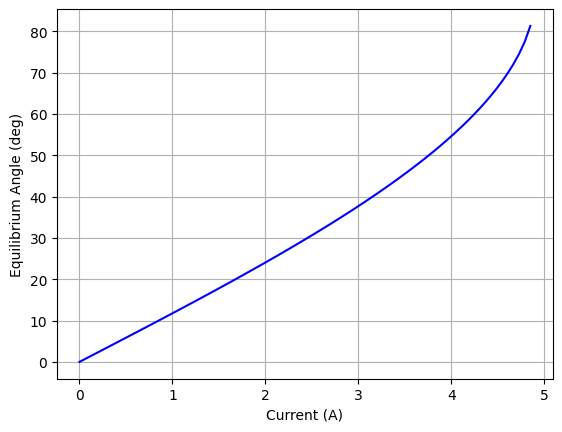

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Physical constants
g = 9.81       # gravity (m/s^2)
L = 0.1        # length of pendulum (m)
m = 0.1        # mass (kg)

km=0.02
I=np.linspace(0,6, 100)

tetaeq=np.asin(I*km/(m*g*L))*180/3.14
plt.plot(I, tetaeq, label='eq', color='blue')
plt.xlabel("Current (A)")
plt.ylabel("Equilibrium Angle (deg)")
plt.grid(True)


**Time-Dependent Solution**

This is a standard second-order linear ODE with step forcing. The general solution is:

$$
\theta(t) = \theta_{\text{hom}}(t) + \theta_{\text{part}}(t)
$$

Particular solution:

$$
\theta_{\text{part}} = \theta_{\text{eq}} = \frac{A}{\omega_0^2}
$$

 Homogeneous solution:

Solve:

$$
\ddot{\theta} + 2\zeta\omega_0 \dot{\theta} + \omega_0^2 \theta = 0
$$

The solution depends on damping regime.

Case: **Underdamped** ($\zeta < 1$)

Let:

$$
\omega_d = \omega_0 \sqrt{1 - \zeta^2}
$$

Then:

$$\boxed{\theta(t) = \theta_{\text{eq}} \left( 1 - e^{-\zeta \omega_0 t} \left( \cos(\omega_d t) + \frac{\zeta}{\sqrt{1 - \zeta^2}} \sin(\omega_d t) \right) \right)}$$

This satisfies:

$$
\theta(0) = 0, \quad \dot{\theta}(0) = 0
$$

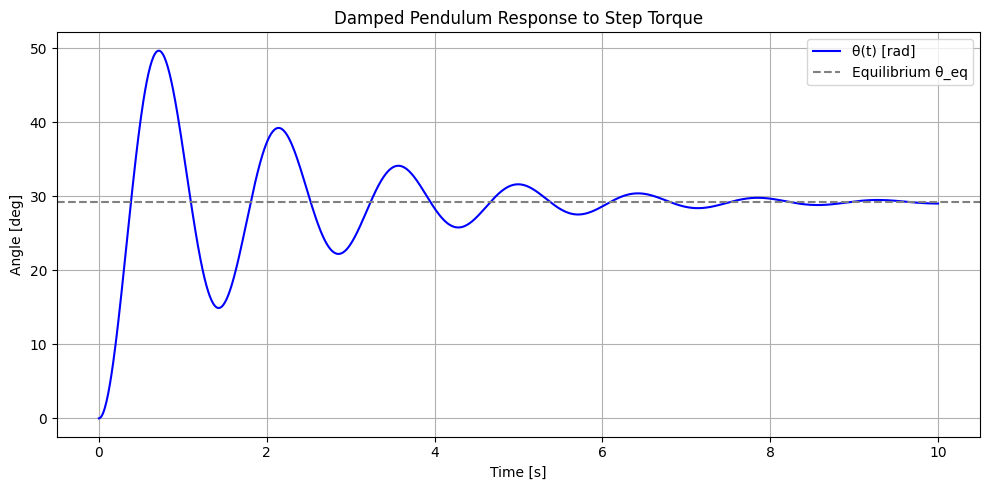

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Physical parameters
m = 0.2          # mass (kg)
L = 0.5          # pendulum length (m)
b = 0.05          # damping coefficient (N*m*s)
g = 9.81         # gravity (m/s^2)

# Torque input (step change)
tau_0 = 0.5      # torque applied after t=0 (N*m)

# Initial conditions
theta_0 = 0.0    # initial angle (rad)
omega_0 = 0.0    # initial angular velocity (rad/s)

# Derived parameters
I = m * L**2
omega_n = np.sqrt(g / L)
zeta = b / (2 * I * omega_n)
omega_d = omega_n * np.sqrt(1 - zeta**2)
theta_eq = tau_0 / (m * g * L)   # new equilibrium position

# Time vector
t = np.linspace(0, 10, 1000)  # 10 seconds, 1000 points

# Coefficients A and B from general solution
A = theta_0 - theta_eq
B = (omega_0 + zeta * omega_n * A) / omega_d

# Analytical solution
theta_t = theta_eq + np.exp(-zeta * omega_n * t) * (A * np.cos(omega_d * t) + B * np.sin(omega_d * t))

#Conversion
rad2deg=180/3.14

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(t, theta_t*rad2deg, label='θ(t) [rad]', color='blue')
plt.axhline(theta_eq*rad2deg, color='gray', linestyle='--', label='Equilibrium θ_eq')
plt.title('Damped Pendulum Response to Step Torque')
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
